0.05727345 0.07688268 0.10033485 0.12688313 0.1539075
0.04552542 0.07600365 0.10338153 0.1294369 0.15290104
0.017271446 0.054266613 0.07755943 0.09999355 0.11817716


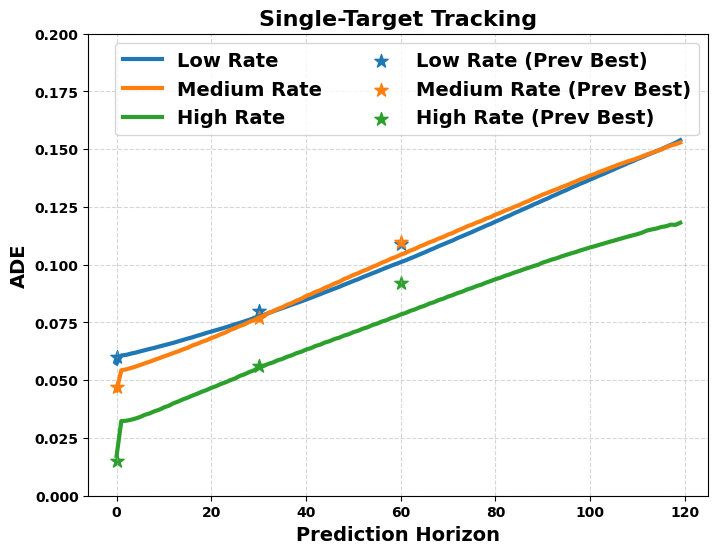

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

base_branches = [
    '/data/sye40/prisoner_logs/MRS/base_branch/3_detects/best',
    '/data/sye40/prisoner_logs/MRS/base_branch/4_detects/best',             
    '/data/sye40/prisoner_logs/MRS/base_branch/7_detects/best']

averages = []
mins = []
for base_branch in base_branches:
    folders = os.listdir(base_branch)
    folders = [os.path.join(base_branch, folder) for folder in folders]

    dist_mins = []
    dist_averages = []
    for folder in folders:
        if '3_detect' in base_branch:
            filepath = os.path.join(folder, 'distances_cond_original.npz')
        else:
            filepath = os.path.join(folder, 'distances_cond.npz')
        file = np.load(filepath, allow_pickle=True)
        dist_mins.append(file['dist_min'])
        dist_averages.append(file['dist_averages'])

    dist_averages = np.concatenate(dist_averages, axis=0)
    dist_mins = np.concatenate(dist_mins, axis=0)

    mins.append(np.mean(dist_mins, axis=0)/ 2428)
    averages.append(np.mean(dist_averages, axis=0)/ 2428)

x = [0, 30, 60]
three_detects = [0.060, 0.080, 0.109]
four_detects = [0.047, 0.077, 0.110]
seven_detects = [0.015, 0.056, 0.092]

print(averages[0][0], averages[0][29], averages[0][59], averages[0][89], averages[0][119])
print(averages[1][0], averages[1][29], averages[1][59], averages[1][89], averages[1][119])
print(averages[2][0], averages[2][29], averages[2][59], averages[2][89], averages[2][119])

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Single-Target Tracking", fontsize=16, fontweight="bold")

ax.plot(np.arange(0, 120), averages[0], linewidth=3, label='Low Rate')
ax.plot(np.arange(0, 120), averages[1], linewidth=3, label='Medium Rate')
ax.plot(np.arange(0, 120), averages[2], linewidth=3, label='High Rate')

xlabel = ax.set_xlabel("Prediction Horizon", fontsize=14)

markersize = 100
ax.scatter(x, three_detects, marker = '*', s=markersize, label='Low Rate (Prev Best)')
ax.scatter(x, four_detects, marker = '*', s=markersize, label='Medium Rate (Prev Best)')
ax.scatter(x, seven_detects, marker = '*', s = markersize, label='High Rate (Prev Best)')

plt.ylabel("ADE", fontsize=14)
plt.ylim(0, 0.2)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=14, ncol = 2)


0.028775739 0.0455167 0.060280103


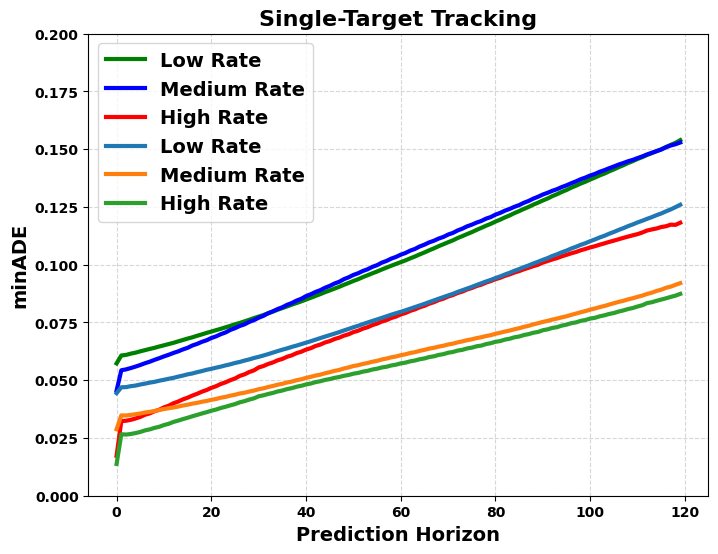

In [7]:
colors = ['green', 'blue', 'red']

fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Single-Target Tracking", fontsize=16, fontweight="bold")

ax.plot(np.arange(0, 120), averages[0], linewidth=3, label='Low Rate', color=colors[0])
ax.plot(np.arange(0, 120), averages[1], linewidth=3, label='Medium Rate', color=colors[1])
ax.plot(np.arange(0, 120), averages[2], linewidth=3, label='High Rate', color=colors[2])

ax.plot(np.arange(0, 120), mins[0], linewidth=3, label='Low Rate', color = colors[0])
ax.plot(np.arange(0, 120), mins[1], linewidth=3, label='Medium Rate', color = colors[1])
ax.plot(np.arange(0, 120), mins[2], linewidth=3, label='High Rate', color = colors[2])

print(mins[1][0], mins[1][29], mins[1][59])

xlabel = ax.set_xlabel("Prediction Horizon", fontsize=14)

# markersize = 100
# ax.scatter(x, three_detects, marker = '*', s=markersize, label='Low Rate')
# ax.scatter(x, four_detects, marker = '*', s=markersize, label='Medium Rate')
# ax.scatter(x, seven_detects, marker = '*', s = markersize, label='High Rate')

plt.ylabel("minADE", fontsize=14)
plt.ylim(0, 0.2)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=14)